# Modify the RGI6 regions files for RGI7 

**List of changes from RGI6 to RGI7**: 
- The southern boundary of region 12 (Caucasus and Middle East) has been shifted south by 2° (from 32°N to 30°N) to encompass a cluster of glaciers which were previously unassigned.
- The region boxes for region 01 (Alaska) used to encompass some islands in the Bering Sea East of Kamtchatka. This subregion contains no glaciers (and probably hasn't for a long time) and is now removed. 
- The data type of the `rgi_code` attribute in the first-order region file is now `str` (was `int`). The `rgi_code` now has a leading zero, for example `02` instead of `2`. 
- Region 19 has been renamed to "*Subantarctic and Antarctic Islands*" (was: "*Antarctic and Subantarctic*")
- The polygon of RGI region 19 has been updated to remove antarctic mainland. Potentially, a new region (`20`, "*Antarctic Mainland*") might be used in the future if glaciers are inventorized there.
- All abbreviations in the second-order regions file have been replaced by their full name (e.g. "East Central" instead of "EC")
- The first-order and second-order region files now have a field called `long_code` which contains a string representing the full region name, using the lowercase with underscores format (e.g. `02_western_canada_usa`). This field is used to name the corresponding RGI shapefiles.
- The subregion `05-11` (Greenland Ice Sheet) has been removed.
- The `WGMS_CODE` column has been deleted from all files.
- The `RGI_CODE` column is now called `o1region` (first order files) and `o2region` (second-order files)

In [64]:
# go down from rgi7_scripts/workflow/preprocessing
data_dir = '../../../rgi7_data/'

In [77]:
import os
import numpy as np
import pandas as pd
import shapely.geometry as shpg
import geopandas as gpd
from utils import mkdir
import shutil
from shapely.validation import make_valid

## Regions 

In [66]:
out_dir = os.path.abspath(os.path.join(data_dir, '00_rgi70_regions'))
mkdir(out_dir)

'/home/www/fmaussion/misc/rgi7_data/00_rgi70_regions'

In [67]:
# Read the new names
df_ref = pd.read_csv(os.path.join(out_dir, '00_rgi70_rgi_region_names.csv'), dtype=str)
df_ref

,FULL_NAME,RGI_CODE,LONG_CODE
0,Alaska,01,01_alaska
1,Western Canada and USA,02,02_western_canada_usa
2,"Arctic Canada, North",03,03_arctic_canada_north
3,"Arctic Canada, South",04,04_arctic_canada_south
4,Greenland Periphery,05,05_greenland_periphery
5,Iceland,06,06_iceland
6,Svalbard and Jan Mayen,07,07_svalbard_jan_mayen
7,Scandinavia,08,08_scandinavia
8,Russian Arctic,09,09_russian_arctic
9,"Asia, North",10,10_asia_north


In [68]:
# Read the RGI region files
rgi_dir = os.path.join(data_dir, 'l0_RGIv6')
rgi_reg = gpd.read_file('zip://' + os.path.join(data_dir, 'l0_RGIv6', '00_rgi60_regions.zip', '00_rgi60_O1Regions.shp'))

In [69]:
# Create a new region 20 based on the subregion outline
rgi_subreg = gpd.read_file('zip://' + os.path.join(data_dir, 'l0_RGIv6', '00_rgi60_regions.zip', '00_rgi60_O2Regions.shp'))

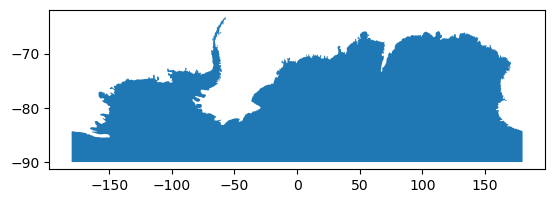

In [70]:
rgi_subreg.loc[rgi_subreg['RGI_CODE'] == '19-31'].plot();

In [71]:
aa_geom = rgi_subreg.loc[rgi_subreg['RGI_CODE'] == '19-31'].iloc[0].geometry

In [72]:
suba_geom = rgi_reg.iloc[-1].geometry.difference(aa_geom)

In [73]:
len(suba_geom.geoms)

2

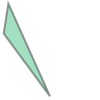

In [74]:
suba_geom.geoms[1]

In [75]:
suba_geom = suba_geom.geoms[0]
suba_geom.is_valid

True

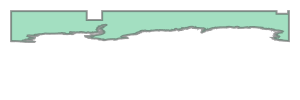

In [76]:
suba_geom

In [14]:
rgi_reg.loc[20, 'geometry'] = suba_geom

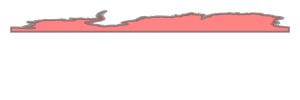

In [78]:
aa_geom

In [79]:
rgi_reg = pd.concat([rgi_reg, gpd.GeoDataFrame([aa_geom], columns=['geometry'])], ignore_index=True)

In [80]:
rgi_reg

,FULL_NAME,RGI_CODE,WGMS_CODE,geometry
0,Alaska,1.0,ALA,"POLYGON ((-133.00000 54.50000, -134.00000 54.5..."
1,Alaska,1.0,ALA,"POLYGON ((180.00000 50.00000, 179.00000 50.000..."
2,Western Canada and USA,2.0,WNA,"POLYGON ((-133.00000 54.50000, -132.00000 54.5..."
3,"Arctic Canada, North",3.0,ACN,"POLYGON ((-125.00000 74.00000, -125.00000 75.0..."
4,"Arctic Canada, South",4.0,ACS,"POLYGON ((-90.00000 74.00000, -89.00000 74.000..."
5,Greenland Periphery,5.0,GRL,"POLYGON ((-75.00000 77.00000, -74.73000 77.510..."
6,Iceland,6.0,ISL,"POLYGON ((-26.00000 59.00000, -26.00000 60.000..."
7,Svalbard and Jan Mayen,7.0,SJM,"POLYGON ((-10.00000 70.00000, -10.00000 71.000..."
8,Scandinavia,8.0,SCA,"POLYGON ((4.00000 70.00000, 4.00000 71.00000, ..."
9,Russian Arctic,9.0,RUA,"POLYGON ((35.00000 70.00000, 35.00000 71.00000..."


In [81]:
(~ rgi_reg.is_valid).sum()

2

In [82]:
rgi_reg.loc[~ rgi_reg.is_valid]

,FULL_NAME,RGI_CODE,WGMS_CODE,geometry
17,Low Latitudes,16.0,TRP,"POLYGON ((-100.00000 -25.00000, -100.00000 -24..."
21,NaN,NaN,NaN,"POLYGON ((131.80027 -66.21825, 131.89393 -66.2..."


In [92]:
for i, s in rgi_reg.loc[~ rgi_reg.is_valid].iterrows():
    corr = make_valid(s.geometry)
    if type(corr) == shpg.Polygon:
        print(f'Success : {s.FULL_NAME}')
    else:
        for g in corr.geoms:
            print(type(g))

Success : Low Latitudes
<class 'shapely.geometry.polygon.Polygon'>
<class 'shapely.geometry.polygon.Polygon'>


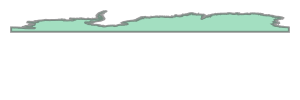

In [90]:
corr.geoms[0]

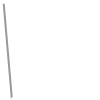

In [91]:
corr.geoms[1]

In [60]:
cor = make_valid(rgi_reg.loc[~ rgi_reg.is_valid].iloc[1].geometry)

In [59]:
rgi_reg.loc[~ rgi_reg.is_valid].iloc[0].geometry.is_valid

False

In [62]:
type(cor)

shapely.geometry.polygon.Polygon

In [18]:
rgi_reg.loc[21, 'geometry'] = aa_geom
rgi_reg.loc[21, 'RGI_CODE'] = 20
rgi_reg['RGI_CODE'] = rgi_reg['RGI_CODE'].astype(int)
rgi_reg.loc[21, 'FULL_NAME'] = 'Antarctic Mainland'
rgi_reg.loc[20, 'FULL_NAME'] = 'Subantarctic and Antarctic Islands'

In [19]:
# Remove the useless Alaska box in the Eastern hemisphere
rgi_reg = rgi_reg.drop(1).reset_index()
del rgi_reg['index']

In [20]:
# Rename things that need renaming
rgi_reg['RGI_CODE'] = [f'{i:02d}' for i in rgi_reg['RGI_CODE']]
rgi_reg = rgi_reg.rename({'WGMS_CODE':'LONG_CODE'}, axis=1)
rgi_reg['LONG_CODE'] = [df_ref.loc[df_ref.RGI_CODE == i, 'LONG_CODE'].values[0] for i in rgi_reg['RGI_CODE']]

In [21]:
# Select the RGI 12 polygon
poly = rgi_reg.loc[rgi_reg.RGI_CODE == '12'].iloc[0].geometry
poly.bounds

(32.0, 31.0, 54.0, 45.0)

Let's go down to 30° South instead:

In [22]:
x, y = poly.exterior.xy
ny = np.where(np.isclose(y, 31), 30, y)
new_poly = shpg.Polygon(np.array((x, ny)).T)
rgi_reg.loc[rgi_reg.RGI_CODE == '12', 'geometry'] = new_poly

In [23]:
# Remove RGI 20
rgi_reg = rgi_reg.iloc[:-1]

In [24]:
# Remame things
names = [s.lower() for s in rgi_reg.columns]
names[1] = 'o1region'
rgi_reg.columns = names
rgi_reg = rgi_reg[['o1region', 'full_name', 'long_code', 'geometry']]
rgi_reg

,o1region,full_name,long_code,geometry
0,01,Alaska,01_alaska,"POLYGON ((-133.00000 54.50000, -134.00000 54.5..."
1,02,Western Canada and USA,02_western_canada_usa,"POLYGON ((-133.00000 54.50000, -132.00000 54.5..."
2,03,"Arctic Canada, North",03_arctic_canada_north,"POLYGON ((-125.00000 74.00000, -125.00000 75.0..."
3,04,"Arctic Canada, South",04_arctic_canada_south,"POLYGON ((-90.00000 74.00000, -89.00000 74.000..."
4,05,Greenland Periphery,05_greenland_periphery,"POLYGON ((-75.00000 77.00000, -74.73000 77.510..."
5,06,Iceland,06_iceland,"POLYGON ((-26.00000 59.00000, -26.00000 60.000..."
6,07,Svalbard and Jan Mayen,07_svalbard_jan_mayen,"POLYGON ((-10.00000 70.00000, -10.00000 71.000..."
7,08,Scandinavia,08_scandinavia,"POLYGON ((4.00000 70.00000, 4.00000 71.00000, ..."
8,09,Russian Arctic,09_russian_arctic,"POLYGON ((35.00000 70.00000, 35.00000 71.00000..."
9,10,"Asia, North",10_asia_north,"POLYGON ((-180.00000 78.00000, -179.00000 78.0..."


In [25]:
print(rgi_reg.set_index('o1region')[['full_name', 'long_code']].to_markdown())

|   o1region | full_name                          | long_code                         |
|-----------:|:-----------------------------------|:----------------------------------|
|         01 | Alaska                             | 01_alaska                         |
|         02 | Western Canada and USA             | 02_western_canada_usa             |
|         03 | Arctic Canada, North               | 03_arctic_canada_north            |
|         04 | Arctic Canada, South               | 04_arctic_canada_south            |
|         05 | Greenland Periphery                | 05_greenland_periphery            |
|         06 | Iceland                            | 06_iceland                        |
|         07 | Svalbard and Jan Mayen             | 07_svalbard_jan_mayen             |
|         08 | Scandinavia                        | 08_scandinavia                    |
|         09 | Russian Arctic                     | 09_russian_arctic                 |
|         10 | Asia, North      

In [26]:
rgi_reg.crs = 'EPSG:4326'

In [27]:
out_file_dir = os.path.join(out_dir, '00_rgi70_O1Regions')
rgi_reg.to_file(out_file_dir)

In [28]:
shutil.make_archive(f'{out_dir}/00_rgi70_O1Regions', 'zip', out_file_dir)

'/home/www/fmaussion/misc/rgi7_data/00_rgi70_regions/00_rgi70_O1Regions.zip'

In [29]:
# Check
rgi_reg = gpd.read_file(out_file_dir)
assert rgi_reg.o1region.dtype == 'O'

In [30]:
gpd.io.file.infer_schema(rgi_reg)

{'geometry': 'Polygon',
 'properties': OrderedDict([('o1region', 'str'),
              ('full_name', 'str'),
              ('long_code', 'str')])}

## Subregions 

In [31]:
rgi_reg = gpd.read_file('zip://' + os.path.join(data_dir, 'l0_RGIv6', '00_rgi60_regions.zip', '00_rgi60_O2Regions.shp'))

In [32]:
# Read the new names
df_ref = pd.read_csv(os.path.join(out_dir, '00_rgi70_rgi_subregion_names.csv'), dtype=str)
df_ref

,FULL_NAME,RGI_CODE,LONG_CODE
0,North Alaska,01-01,NaN
1,Alaska Range (Wrangell/Kilbuck),01-02,NaN
2,Alaska Peninsula (Aleutians),01-03,NaN
3,Alaska Peninsula (Aleutians),01-03,NaN
4,West Chugach Mountains (Talkeetna),01-04,NaN
...,...,...,...
88,Northeast Antarctic Peninsula 7I2,19-21,NaN
89,Southeast Antarctic Peninsula 7I3,19-22,NaN
90,Ronne-Filchner Ice Shelf 7J,19-23,NaN
91,West Queen Maud Land 7K,19-24,NaN


In [33]:
# Create a long code
long = []
for s in df_ref['FULL_NAME']:
    s = s.replace('(', '').replace(')', '').replace('/', '_').replace('-', '_')
    s = '_'.join([so.lower() for so in s.split(' ')])
    long.append(s.replace('__', '_').replace('__', '_'))
df_ref['LONG_CODE'] = long

In [34]:
# Move RGI12 a bit south
poly = rgi_reg.loc[rgi_reg.RGI_CODE == '12-02'].iloc[0].geometry
poly.bounds

(34.0, 32.0, 53.0, 42.0)

In [35]:
x, y = poly.exterior.xy
ny = np.where(np.isclose(y, 32), 30, y)
new_poly = shpg.Polygon(np.array((x, ny)).T)
rgi_reg.loc[rgi_reg.RGI_CODE == '12-02', 'geometry'] = new_poly

In [36]:
# Remove the useless Alaska box in the Eastern hemisphere
rgi_reg = rgi_reg.drop(3).reset_index()
del rgi_reg['index']

In [37]:
# Rename things that need renaming
rgi_reg.loc[91, 'RGI_CODE'] = '20-01'
rgi_reg.loc[91, 'FULL_NAME'] = 'Antarctic Mainland'
rgi_reg = rgi_reg.rename({'WGMS_CODE':'LONG_CODE'}, axis=1)
rgi_reg['FULL_NAME'] = [df_ref.loc[df_ref.RGI_CODE == i, 'FULL_NAME'].values[0] for i in rgi_reg['RGI_CODE']]
rgi_reg['LONG_CODE'] = [i + '_' + df_ref.loc[df_ref.RGI_CODE == i, 'LONG_CODE'].values[0] for i in rgi_reg['RGI_CODE']]

In [38]:
# Remove RGI 20
rgi_reg = rgi_reg.iloc[:-1]

In [39]:
# Remove Greenland icesheet
rgi_reg = rgi_reg.loc[rgi_reg.RGI_CODE != '05-11']

In [40]:
# Add o1region for help
rgi_reg['o1Region'] = [s.split('-')[0] for s in rgi_reg.RGI_CODE]

In [41]:
# order 
rgi_reg = rgi_reg[['o1Region', 'RGI_CODE', 'FULL_NAME', 'LONG_CODE', 'geometry']]

In [42]:
# Remame things
names = [s.lower() for s in rgi_reg.columns]
names[1] = 'o2region'
rgi_reg.columns = names
rgi_reg

,o1region,o2region,full_name,long_code,geometry
0,01,01-01,North Alaska,01-01_north_alaska,"POLYGON ((-169.00000 64.00000, -169.00000 65.0..."
1,01,01-02,Alaska Range (Wrangell/Kilbuck),01-02_alaska_range_wrangell_kilbuck,"POLYGON ((-144.40436 61.48531, -144.48100 61.5..."
2,01,01-03,Alaska Peninsula (Aleutians),01-03_alaska_peninsula_aleutians,"POLYGON ((-180.00000 57.00000, -179.00000 57.0..."
3,01,01-04,West Chugach Mountains (Talkeetna),01-04_west_chugach_mountains_talkeetna,"POLYGON ((-151.32973 58.74602, -151.57953 58.8..."
4,01,01-05,Saint Elias Mountains,01-05_saint_elias_mountains,"POLYGON ((-144.25108 61.44018, -144.07510 61.3..."
...,...,...,...,...,...
86,19,19-20,West Antarctic Peninsula 7I1,19-20_west_antarctic_peninsula_7i1,"POLYGON ((-67.00000 -69.11947, -67.23873 -69.1..."
87,19,19-21,Northeast Antarctic Peninsula 7I2,19-21_northeast_antarctic_peninsula_7i2,"POLYGON ((-62.41123 -69.50624, -62.41913 -69.5..."
88,19,19-22,Southeast Antarctic Peninsula 7I3,19-22_southeast_antarctic_peninsula_7i3,"POLYGON ((-50.00000 -74.80000, -51.00000 -74.8..."
89,19,19-23,Ronne-Filchner Ice Shelf 7J,19-23_ronne_filchner_ice_shelf_7j,"POLYGON ((-42.00000 -74.80000, -41.00000 -74.8..."


In [43]:
rgi_reg.crs = 'EPSG:4326'

In [44]:
out_file_dir = os.path.join(out_dir, '00_rgi70_O2Regions')
rgi_reg.to_file(out_file_dir)

In [45]:
shutil.make_archive(f'{out_dir}/00_rgi70_O2Regions', 'zip', out_file_dir)

'/home/www/fmaussion/misc/rgi7_data/00_rgi70_regions/00_rgi70_O2Regions.zip'

In [46]:
print(rgi_reg.set_index('o2region')[['full_name', 'long_code']].to_markdown())

| o2region   | full_name                                | long_code                                    |
|:-----------|:-----------------------------------------|:---------------------------------------------|
| 01-01      | North Alaska                             | 01-01_north_alaska                           |
| 01-02      | Alaska Range (Wrangell/Kilbuck)          | 01-02_alaska_range_wrangell_kilbuck          |
| 01-03      | Alaska Peninsula (Aleutians)             | 01-03_alaska_peninsula_aleutians             |
| 01-04      | West Chugach Mountains (Talkeetna)       | 01-04_west_chugach_mountains_talkeetna       |
| 01-05      | Saint Elias Mountains                    | 01-05_saint_elias_mountains                  |
| 01-06      | North Coast Ranges                       | 01-06_north_coast_ranges                     |
| 02-01      | Mackenzie and Selwyn Mountains           | 02-01_mackenzie_and_selwyn_mountains         |
| 02-02      | South Coast Ranges                      